In [ ]:
# pip install moviepy

In [21]:
import numpy as np # used for arrays
import gym # pull the environment
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
import time # to get the time
import math # needed for calculations
import random
import matplotlib.pyplot as plt


In [2]:
env = gym.make("CartPole-v1")
print(env.action_space.n)

2


In [3]:
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [4]:
observation = env.reset()
print("Initial observations:", observation)

Initial observations: (array([1.1487492e-02, 3.5174849e-05, 4.7990646e-02, 6.9576092e-03],
      dtype=float32), {})


In [5]:
observation, reward, done, info = env.step(0)[:4]
# print(env.step(0))
print("New observations after choosing action 0:", observation)
print("Reward for this step:", reward)
print("Is this round done?", done)

New observations after choosing action 0: [ 0.0114882  -0.19574101  0.0481298   0.31438762]
Reward for this step: 1.0
Is this round done? False


C:\Users\bryan\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [6]:
observation = env.reset()
cumulative_reward = 0
done = False
while not done:
    observation, reward, done, info = env.step(0)[:4]
    cumulative_reward += reward
print("Cumulative reward for this round:", cumulative_reward)

Cumulative reward for this round: 10.0


## Task 1

## Reinforcement Learning Agent (Using _______)

In [7]:
def RL_agent(observation):
    return random.randint(0, 1)

In [8]:
observation = env.reset()
action = RL_agent(observation)
print("Observation:", observation)
print("Chosen action:", action)

Observation: (array([-0.0270195 , -0.04012075,  0.04869337, -0.0056738 ], dtype=float32), {})
Chosen action: 1


### Task 1 Answer

In [9]:
observation = env.reset()
random_state = env.observation_space.sample()
chosen_action = RL_agent(random_state)

# [0]: Cart Position, [1]: Cart Velocity, [2]: Pole Angle, [3]: Pole Angular Velocity
print("Random state: ", random_state)
print("Chosen action: ", chosen_action)

Random state:  [ 3.6929953e+00  1.3148887e+36 -2.9374990e-01  3.3540420e+38]
Chosen action:  0


In [13]:
observation, reward, done, info = env.step(chosen_action)[:4]
print("New observations after choosing the chosen action:", observation)
print("Reward for this step:", reward)
print("Is this round done?", done)

New observations after choosing the chosen action: [-0.01165588 -0.42399356  0.02078589  0.6289915 ]
Reward for this step: 1.0
Is this round done? False


Explanation: We used a sample from the observation space and inputted it into the policy agent to determine the action to be taken.

## Task 2: Demonstrate the effectiveness of the RL agent

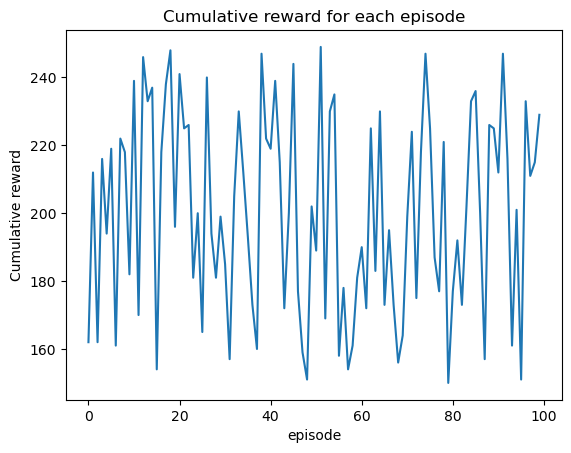

In [14]:
episode_results = np.random.randint(150, 250, size=100)
plt.plot(episode_results)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()

Printing out the average reward over the 100 episodes.

In [15]:
print("Average cumulative reward:", episode_results.mean())
print("Is my agent good enough?", episode_results.mean() > 195)

Average cumulative reward: 200.26
Is my agent good enough? True


### Task 2 Answer

In [16]:
def run_episodes(agent, num_episodes):
    episode_rewards = []
    for episode in range(num_episodes):
        total_reward = 0
        observation = env.reset()
        done = False
        
        while not done:
            chosen_action = agent(observation)
            observation, reward, done, info = env.step(chosen_action)[:4]
            total_reward += reward
        
        episode_rewards.append(total_reward)
        
    return episode_rewards

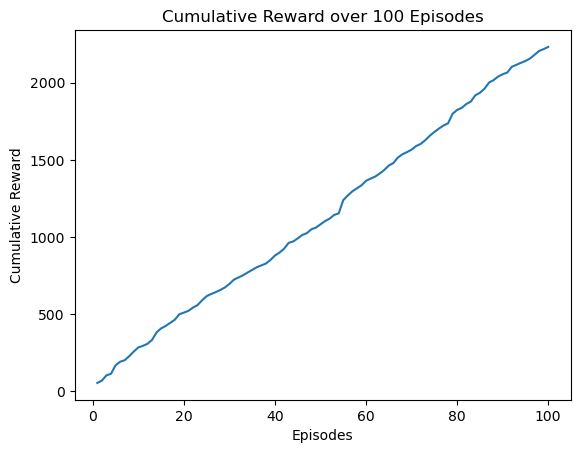

In [17]:
num_episodes = 100
episode_rewards = run_episodes(RL_agent, num_episodes)

# Plot cumulative reward against episodes
plt.plot(np.arange(1, num_episodes + 1), np.cumsum(episode_rewards))
plt.xlabel("Episodes")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward over 100 Episodes")
plt.show()

In [18]:
average_reward = np.mean(episode_rewards)
print(f"Average reward over {num_episodes} Episodes: {average_reward}")

Average reward over 100 Episodes: 22.31


In [19]:
if average_reward > 195:
    print("The average reward is > 195")
else:
    print("The average reward did not meet the required threshold")

The average reward did not meet the required threshold


## Task 3: Render one episode played by the agent

In [34]:
# from IPython.display import display, clear_output

# def render_episode(agent):
#     observation = env.reset()
#     frames = []

#     while True:
#         frames.append(env.render(mode='rgb_array'))
#         action = agent(observation)
#         observation, _, done, _ = env.step(action)

#         if done:
#             break

#     env.close()

#     return frames

# # Render one episode played by the random policy agent
# episode_frames = render_episode(RL_agent)

# # Display the frames using Matplotlib
# fig, ax = plt.subplots()

# for frame in episode_frames:
#     ax.imshow(frame)
#     plt.pause(0.05)  # Adjust the pause time if needed

# plt.show()
#     done = False
    
#     while not done:
#         action = agent(observation)
#         next_observation, reward, done, info = env.step(chosen_action)[:4]
        
#         clear_output(wait=True)
#         display(env.render(mode='rbg_array'))
        
#         observation = next_observation
#     env.close()
    
# render_episode(RL_agent)

In [35]:
# env = RecordVideo(gym.make("CartPole-v1"), "./video")
# observation = env.reset()
# while True:
#     env.render()
#     #your agent goes here
#     action = RL_agent(observation)
#     observation, reward, done, info = env.step(action)[:4]
#     if done: 
#       break
# env.close()
# show_video()

In [41]:
env = RecordVideo(gym.make("CartPole-v1"), "./video")
observation = env.reset()
while True:
    env.render()
    action = RL_agent(observation)
    observation, reward, done, info = env.step(action) [:4]
    if done: 
      break
env.close()
show_video()

Could not find video
